Libraries

In [287]:
import numpy as np
import pandas as pd

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

import pickle

from sklearn.linear_model import LogisticRegression

import matplotlib.pyplot as plt
import matplotlib.axes as axs
import seaborn as sns
sns.set()

from sklearn.linear_model import LinearRegression

Data Preparation

In [2]:
#Load data
df_purchase = pd.read_csv('C:\\Users\\samru\\Downloads\\purchase data.csv')

#Import Scaler
scaler = pickle.load(open('scaler.pickle', 'rb'))

#Import PCA
pca = pickle.load(open('pca.pickle', 'rb'))

#Import K-Means
kmeans_pca = pickle.load(open('kmeans_pca.pickle', 'rb'))

#Standardization
features = df_purchase[['Sex', 'Marital status', 'Age', 'Education', 'Income', 'Occupation', 'Settlement size']]
df_purchase_segm_std = scaler.transform(features)

#Apply PCA
df_purchase_segm_pca = pca.transform(df_purchase_segm_std)

#Segment Data
purchase_segm_kmeans_pca = kmeans_pca.predict(df_purchase_segm_pca)

#Create a copy of DataFrame
df_purchase_predictors = df_purchase.copy()

#Add Segment Labels
df_purchase_predictors['Segment'] = purchase_segm_kmeans_pca
segment_dummies = pd.get_dummies(purchase_segm_kmeans_pca,prefix = 'Segment', prefix_sep = '_')
df_purchase_predictors = pd.concat([df_purchase_predictors,segment_dummies], axis = 1)

df_pa = df_purchase_predictors


Purchase Probability Model

In [3]:
Y = df_pa['Incidence']

In [6]:
#price irrespective of brand to know if avg proce affects the purchase
X = pd.DataFrame()
X['Mean_Price'] = (df_pa['Price_1'] +
                   df_pa['Price_2'] +
                   df_pa['Price_3'] + 
                   df_pa['Price_4'] +
                   df_pa['Price_5'] ) / 5

In [8]:
model_purchase = LogisticRegression(solver = 'sag')
model_purchase.fit(X, Y)

LogisticRegression(solver='sag')

In [9]:
#calculates the coeffs of the independent variables #avg price 
model_purchase.coef_   

#decrease in price will lead to increase in purchase probability

array([[-2.34795931]])

Price Elasticity of Purchase Probability

In [10]:
 df_pa[['Price_1', 'Price_2', 'Price_3', 'Price_4', 'Price_5']].describe()

,Price_1,Price_2,Price_3,Price_4,Price_5
count,58693.000000,58693.000000,58693.000000,58693.000000,58693.000000
mean,1.392074,1.780999,2.006789,2.159945,2.654798
std,0.091139,0.170868,0.046867,0.089825,0.098272
min,1.100000,1.260000,1.870000,1.760000,2.110000
25%,1.340000,1.580000,1.970000,2.120000,2.630000
50%,1.390000,1.880000,2.010000,2.170000,2.670000
75%,1.470000,1.890000,2.060000,2.240000,2.700000
max,1.590000,1.900000,2.140000,2.260000,2.800000


In [11]:
price_range = np.arange(0.5, 3.5, 0.01)
price_range

array([0.5 , 0.51, 0.52, 0.53, 0.54, 0.55, 0.56, 0.57, 0.58, 0.59, 0.6 ,
       0.61, 0.62, 0.63, 0.64, 0.65, 0.66, 0.67, 0.68, 0.69, 0.7 , 0.71,
       0.72, 0.73, 0.74, 0.75, 0.76, 0.77, 0.78, 0.79, 0.8 , 0.81, 0.82,
       0.83, 0.84, 0.85, 0.86, 0.87, 0.88, 0.89, 0.9 , 0.91, 0.92, 0.93,
       0.94, 0.95, 0.96, 0.97, 0.98, 0.99, 1.  , 1.01, 1.02, 1.03, 1.04,
       1.05, 1.06, 1.07, 1.08, 1.09, 1.1 , 1.11, 1.12, 1.13, 1.14, 1.15,
       1.16, 1.17, 1.18, 1.19, 1.2 , 1.21, 1.22, 1.23, 1.24, 1.25, 1.26,
       1.27, 1.28, 1.29, 1.3 , 1.31, 1.32, 1.33, 1.34, 1.35, 1.36, 1.37,
       1.38, 1.39, 1.4 , 1.41, 1.42, 1.43, 1.44, 1.45, 1.46, 1.47, 1.48,
       1.49, 1.5 , 1.51, 1.52, 1.53, 1.54, 1.55, 1.56, 1.57, 1.58, 1.59,
       1.6 , 1.61, 1.62, 1.63, 1.64, 1.65, 1.66, 1.67, 1.68, 1.69, 1.7 ,
       1.71, 1.72, 1.73, 1.74, 1.75, 1.76, 1.77, 1.78, 1.79, 1.8 , 1.81,
       1.82, 1.83, 1.84, 1.85, 1.86, 1.87, 1.88, 1.89, 1.9 , 1.91, 1.92,
       1.93, 1.94, 1.95, 1.96, 1.97, 1.98, 1.99, 2.

In [12]:
df_price_range = pd.DataFrame(price_range)

In [13]:
Y_pr = model_purchase.predict_proba(df_price_range)

C:\Users\samru\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [15]:
Y_pr

array([[0.08209818, 0.91790182],
       [0.083885  , 0.916115  ],
       [0.08570709, 0.91429291],
       [0.08756497, 0.91243503],
       [0.08945918, 0.91054082],
       [0.09139027, 0.90860973],
       [0.09335876, 0.90664124],
       [0.09536521, 0.90463479],
       [0.09741014, 0.90258986],
       [0.09949411, 0.90050589],
       [0.10161763, 0.89838237],
       [0.10378126, 0.89621874],
       [0.10598552, 0.89401448],
       [0.10823094, 0.89176906],
       [0.11051805, 0.88948195],
       [0.11284738, 0.88715262],
       [0.11521944, 0.88478056],
       [0.11763475, 0.88236525],
       [0.12009382, 0.87990618],
       [0.12259716, 0.87740284],
       [0.12514525, 0.87485475],
       [0.1277386 , 0.8722614 ],
       [0.13037767, 0.86962233],
       [0.13306295, 0.86693705],
       [0.13579491, 0.86420509],
       [0.13857398, 0.86142602],
       [0.14140063, 0.85859937],
       [0.14427527, 0.85572473],
       [0.14719834, 0.85280166],
       [0.15017024, 0.84982976],
       [0.

In [16]:
purchase_pr = Y_pr[:][:, 1] #the second column represents the probability of buying

In [17]:
#calculating Purchase probability Elasticity
pe = model_purchase.coef_[:,0] * price_range * (1-purchase_pr)

In [19]:
df_price_elasticities = pd.DataFrame(price_range)

In [21]:
df_price_elasticities = df_price_elasticities.rename(columns = {0: "Price_Point"})
df_price_elasticities['Mean_PE'] = pe
df_price_elasticities

,Price_Point,Mean_PE
0,0.50,-0.096382
1,0.51,-0.100449
2,0.52,-0.104643
3,0.53,-0.108967
4,0.54,-0.113425
...,...,...
295,3.45,-8.012537
296,3.46,-8.037786
297,3.47,-8.063001
298,3.48,-8.088182


In [22]:
pd.options.display.max_rows = None
df_price_elasticities

,Price_Point,Mean_PE
0,0.50,-0.096382
1,0.51,-0.100449
2,0.52,-0.104643
3,0.53,-0.108967
4,0.54,-0.113425
5,0.55,-0.118019
6,0.56,-0.122753
7,0.57,-0.127631
8,0.58,-0.132655
9,0.59,-0.137829


Text(0.5, 1.0, 'Price Elasticity of Purchase Probability')

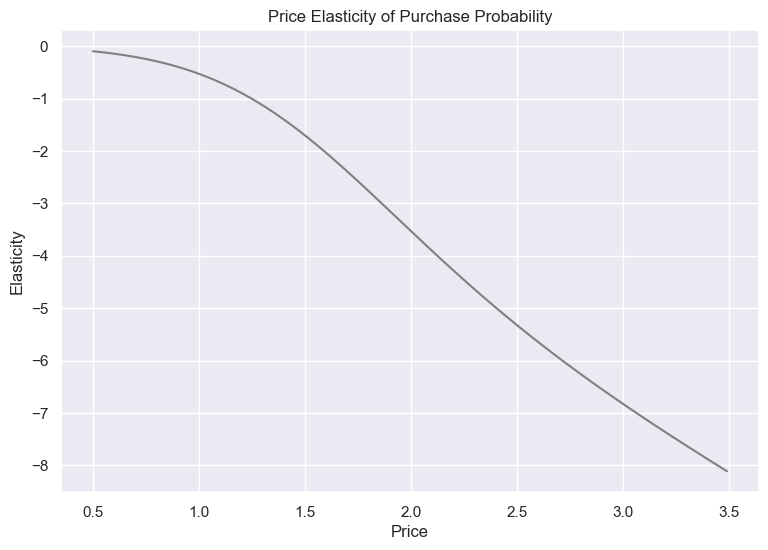

In [24]:
plt.figure(figsize = (9,6))
plt.plot(price_range, pe, color ='grey')
plt.xlabel('Price')
plt.ylabel('Elasticity')
plt.title('Price Elasticity of Purchase Probability')

Purchase probability by segment

Segment 1 - Career-Focused

In [26]:
 df_pa_segment_1 = df_pa[df_pa['Segment'] == 1]

In [27]:
Y = df_pa_segment_1['Incidence']

In [28]:
X = pd.DataFrame()

In [29]:
X['Mean_Price'] = (df_pa_segment_1['Price_1'] +
                   df_pa_segment_1['Price_2'] +
                   df_pa_segment_1['Price_3'] +
                   df_pa_segment_1['Price_4'] +
                   df_pa_segment_1['Price_5']) / 5
                   
                   


In [30]:
model_incidence_segment_1 = LogisticRegression(solver = 'sag')
model_incidence_segment_1.fit(X, Y)

LogisticRegression(solver='sag')

In [31]:
model_incidence_segment_1.coef_

array([[-1.7058229]])

In [32]:
# it has lower impact when we calculate elasticities


In [33]:
Y_segment_1 = model_incidence_segment_1.predict_proba(df_price_range)
purchase_pr_segment_1 = Y_segment_1[:][:, 1]
pe_segment_1 = model_incidence_segment_1.coef_[:,0]*price_range*(1 - purchase_pr_segment_1)

C:\Users\samru\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


Results

In [35]:
df_price_elasticities['PE_Segment_1'] = pe_segment_1
df_price_elasticities

,Price_Point,Mean_PE,PE_Segment_1
0,0.50,-0.096382,-0.118839
1,0.51,-0.100449,-0.123006
2,0.52,-0.104643,-0.127267
3,0.53,-0.108967,-0.131621
4,0.54,-0.113425,-0.136071
5,0.55,-0.118019,-0.140617
6,0.56,-0.122753,-0.145263
7,0.57,-0.127631,-0.150008
8,0.58,-0.132655,-0.154855
9,0.59,-0.137829,-0.159805


Text(0.5, 1.0, 'Price Elasticity of Purchase Probability')

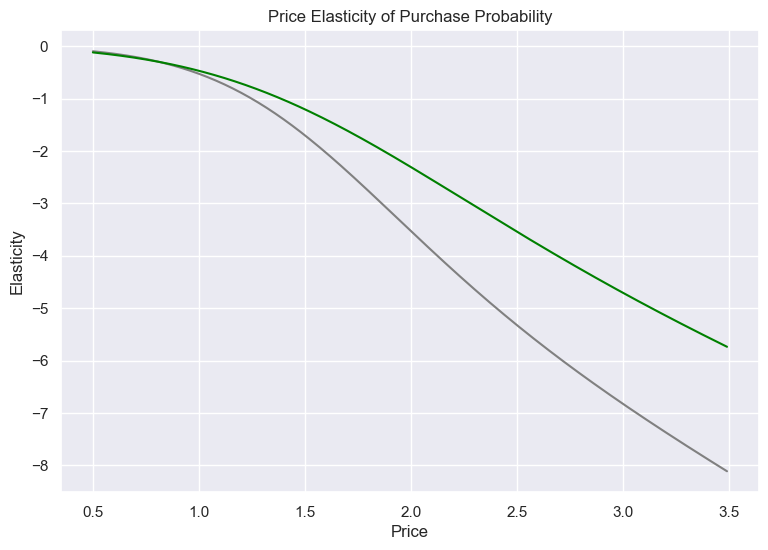

In [36]:
plt.figure(figsize = (9,6))
plt.plot(price_range, pe, color ='grey')
plt.plot(price_range, pe_segment_1, color ='green')
plt.xlabel('Price')
plt.ylabel('Elasticity')
plt.title('Price Elasticity of Purchase Probability')

Segment 2

In [39]:
#select customers from segment 2
df_pa_segment_2 = df_pa[df_pa['Segment'] == 2]

In [40]:
#build Logistic regression model
Y = df_pa_segment_2['Incidence']
X = pd.DataFrame()

#calculate avg price for the product
X['Mean_Price'] = (df_pa_segment_2['Price_1'] +
                   df_pa_segment_2['Price_2'] +
                   df_pa_segment_2['Price_3'] +
                   df_pa_segment_2['Price_4'] +
                   df_pa_segment_2['Price_5']) / 5

model_incidence_segment_2 = LogisticRegression(solver = 'sag')
model_incidence_segment_2.fit(X, Y)

#calculate elasticities
model_incidence_segment_2.coef_
Y_segment_2 = model_incidence_segment_2.predict_proba(df_price_range)
purchase_pr_segment_2 = Y_segment_2[:][:, 1]
pe_segment_2 = model_incidence_segment_2.coef_[:,0]*price_range*(1 - purchase_pr_segment_2)


C:\Users\samru\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


Results

In [41]:
df_price_elasticities['PE_Segment_2'] = pe_segment_2
df_price_elasticities

,Price_Point,Mean_PE,PE_Segment_1,PE_Segment_2
0,0.50,-0.096382,-0.118839,-0.030914
1,0.51,-0.100449,-0.123006,-0.032680
2,0.52,-0.104643,-0.127267,-0.034533
3,0.53,-0.108967,-0.131621,-0.036478
4,0.54,-0.113425,-0.136071,-0.038517
5,0.55,-0.118019,-0.140617,-0.040654
6,0.56,-0.122753,-0.145263,-0.042896
7,0.57,-0.127631,-0.150008,-0.045245
8,0.58,-0.132655,-0.154855,-0.047707
9,0.59,-0.137829,-0.159805,-0.050286


Text(0.5, 1.0, 'Price Elasticity of Purchase Probability')

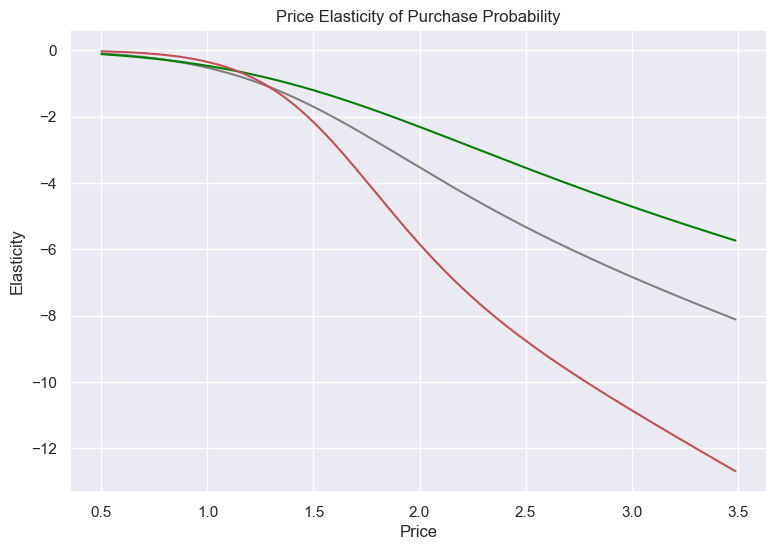

In [42]:
plt.figure(figsize = (9,6))
plt.plot(price_range, pe, color ='grey')
plt.plot(price_range, pe_segment_1, color ='green')
plt.plot(price_range, pe_segment_2, color ='r')
plt.xlabel('Price')
plt.ylabel('Elasticity')
plt.title('Price Elasticity of Purchase Probability')

In [43]:
#it is more price sensitive as compared and a lot compared to the career focused
#with increase in price 

Segment 3

In [44]:
#select customers from segment 3
df_pa_segment_3 = df_pa[df_pa['Segment'] == 3]

In [45]:
#build Logistic regression model
Y = df_pa_segment_3['Incidence']
X = pd.DataFrame()

#calculate avg price for the product
X['Mean_Price'] = (df_pa_segment_3['Price_1'] +
                   df_pa_segment_3['Price_2'] +
                   df_pa_segment_3['Price_3'] +
                   df_pa_segment_3['Price_4'] +
                   df_pa_segment_3['Price_5']) / 5

model_incidence_segment_3 = LogisticRegression(solver = 'sag')
model_incidence_segment_3.fit(X, Y)

#calculate elasticities
model_incidence_segment_3.coef_
Y_segment_3 = model_incidence_segment_3.predict_proba(df_price_range)
purchase_pr_segment_3 = Y_segment_3[:][:, 1]
pe_segment_3 = model_incidence_segment_3.coef_[:,0]*price_range*(1 - purchase_pr_segment_3)

C:\Users\samru\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [46]:
df_price_elasticities['PE_Segment_3'] = pe_segment_3
df_price_elasticities

,Price_Point,Mean_PE,PE_Segment_1,PE_Segment_2,PE_Segment_3
0,0.50,-0.096382,-0.118839,-0.030914,-0.168041
1,0.51,-0.100449,-0.123006,-0.032680,-0.172966
2,0.52,-0.104643,-0.127267,-0.034533,-0.177961
3,0.53,-0.108967,-0.131621,-0.036478,-0.183027
4,0.54,-0.113425,-0.136071,-0.038517,-0.188164
5,0.55,-0.118019,-0.140617,-0.040654,-0.193373
6,0.56,-0.122753,-0.145263,-0.042896,-0.198654
7,0.57,-0.127631,-0.150008,-0.045245,-0.204009
8,0.58,-0.132655,-0.154855,-0.047707,-0.209436
9,0.59,-0.137829,-0.159805,-0.050286,-0.214937


Text(0.5, 1.0, 'Price Elasticity of Purchase Probability')

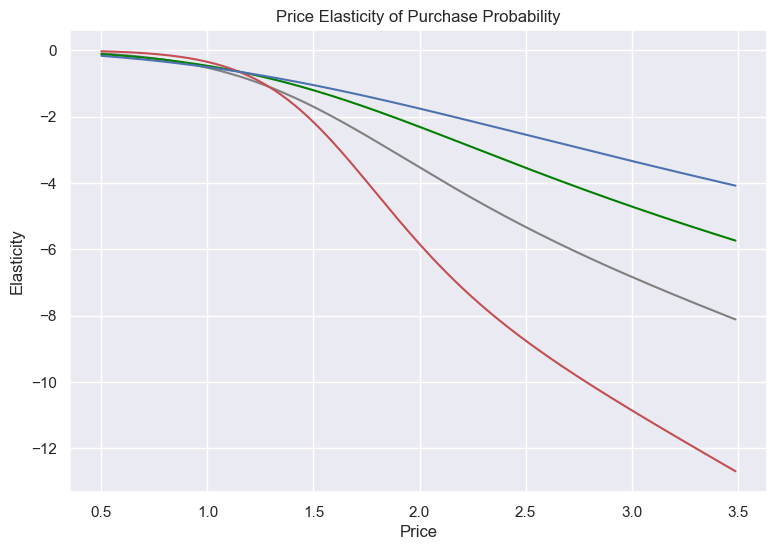

In [47]:
plt.figure(figsize = (9,6))
plt.plot(price_range, pe, color ='grey')
plt.plot(price_range, pe_segment_1, color ='green')
plt.plot(price_range, pe_segment_2, color ='r')
plt.plot(price_range, pe_segment_3, color ='b')
plt.xlabel('Price')
plt.ylabel('Elasticity')
plt.title('Price Elasticity of Purchase Probability')

segment 0

In [54]:
#select customers from segment 0
df_pa_segment_0 = df_pa[df_pa['Segment'] == 0]

In [55]:
#build Logistic regression model
Y = df_pa_segment_0['Incidence']
X = pd.DataFrame()

#calculate avg price for the product
X['Mean_Price'] = (df_pa_segment_0['Price_1'] +
                   df_pa_segment_0['Price_2'] +
                   df_pa_segment_0['Price_3'] +
                   df_pa_segment_0['Price_4'] +
                   df_pa_segment_0['Price_5']) / 5

model_incidence_segment_0 = LogisticRegression(solver = 'sag')
model_incidence_segment_0.fit(X, Y)

#calculate elasticities
model_incidence_segment_0.coef_
Y_segment_0 = model_incidence_segment_0.predict_proba(df_price_range)
purchase_pr_segment_0 = Y_segment_0[:][:, 1]
pe_segment_0 = model_incidence_segment_0.coef_[:,0]*price_range*(1 - purchase_pr_segment_0)

C:\Users\samru\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [56]:
df_price_elasticities['PE_Segment_0'] = pe_segment_0
df_price_elasticities

,Price_Point,Mean_PE,PE_Segment_1,PE_Segment_2,PE_Segment_3,PE_Segment_0
0,0.50,-0.096382,-0.118839,-0.030914,-0.168041,-0.211156
1,0.51,-0.100449,-0.123006,-0.032680,-0.172966,-0.217725
2,0.52,-0.104643,-0.127267,-0.034533,-0.177961,-0.224403
3,0.53,-0.108967,-0.131621,-0.036478,-0.183027,-0.231189
4,0.54,-0.113425,-0.136071,-0.038517,-0.188164,-0.238084
5,0.55,-0.118019,-0.140617,-0.040654,-0.193373,-0.245089
6,0.56,-0.122753,-0.145263,-0.042896,-0.198654,-0.252205
7,0.57,-0.127631,-0.150008,-0.045245,-0.204009,-0.259432
8,0.58,-0.132655,-0.154855,-0.047707,-0.209436,-0.266772
9,0.59,-0.137829,-0.159805,-0.050286,-0.214937,-0.274224


Text(0.5, 1.0, 'Price Elasticity of Purchase Probability')

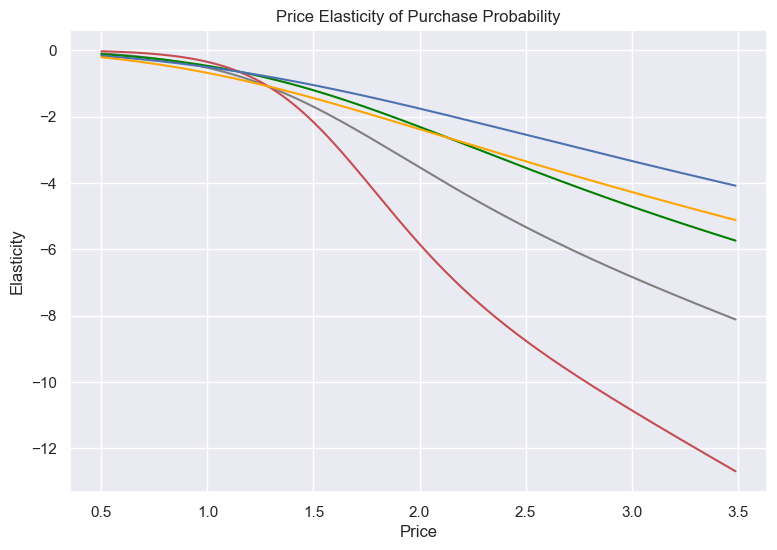

In [57]:
plt.figure(figsize = (9,6))
plt.plot(price_range, pe, color ='grey')
plt.plot(price_range, pe_segment_1, color ='green')
plt.plot(price_range, pe_segment_2, color ='r')
plt.plot(price_range, pe_segment_3, color ='b')
plt.plot(price_range, pe_segment_0, color ='orange')
plt.xlabel('Price')
plt.ylabel('Elasticity')
plt.title('Price Elasticity of Purchase Probability')

Purchase Probability with Promotion Feature

Data Prep

In [211]:
Y = df_pa['Incidence']


In [212]:
X = pd.DataFrame()

#calculate avg price for the product
X['Mean_Price'] = (df_pa['Price_1'] +
                   df_pa['Price_2'] +
                   df_pa['Price_3'] +
                   df_pa['Price_4'] +
                   df_pa['Price_5']) / 5

In [213]:
X['Mean_Promotion'] = (df_pa['Promotion_1']+
                      df_pa['Promotion_2']+
                      df_pa['Promotion_3']+
                      df_pa['Promotion_4']+
                      df_pa['Promotion_5']) / 5
X.head()

,Mean_Price,Mean_Promotion
0,2.044,0.2
1,2.028,0.0
2,2.028,0.0
3,2.028,0.0
4,2.030,0.0


Model Estimation

In [214]:
model_incidence_promotion = LogisticRegression(solver = 'sag')
model_incidence_promotion.fit(X, Y)
model_incidence_promotion.coef_

array([[-1.4938891 ,  0.56145445]])

Price Elasticity with Promotion 

In [218]:
df_price_elasticity_promotion = pd.DataFrame(price_range)
df_price_elasticity_promotion = df_price_elasticity_promotion.rename(columns = {0: "Mean_Price"})

In [219]:
df_price_elasticity_promotion['Mean_Promotion'] = 1

In [220]:
Y_promotion = model_incidence_promotion.predict_proba(df_price_elasticity_promotion)

In [221]:
promo = Y_promotion[:,1]
price_elasticity_promo = (model_incidence_promotion.coef_[:, 0] * price_range) * (1 - promo)

In [222]:
df_price_elasticities['Elasticity_Promotion_1'] = price_elasticity_promo

 Price Elasticity without promotion

In [155]:
df_price_elasticity_promotion_no = pd.DataFrame(price_range)
df_price_elasticity_promotion_no = df_price_elasticity_promotion_no.rename(columns = {0: "Price_Range"})


In [156]:
df_price_elasticity_promotion_no['Promotion'] = 0

In [146]:
Y_no_promo = model_incidence_promotion.predict_proba(df_price_elasticity_promotion_no)

In [157]:
no_promo = Y_no_promo[: , 1]
price_elasticity_no_promo = model_incidence_promotion.coef_[:, 0] * price_range * (1 - no_promo)

In [158]:
df_price_elasticities['Elasticity_Promotion_0'] = price_elasticity_no_promo

Text(0.5, 1.0, 'Price Elasticity of Purchase Probability with and without Promotion')

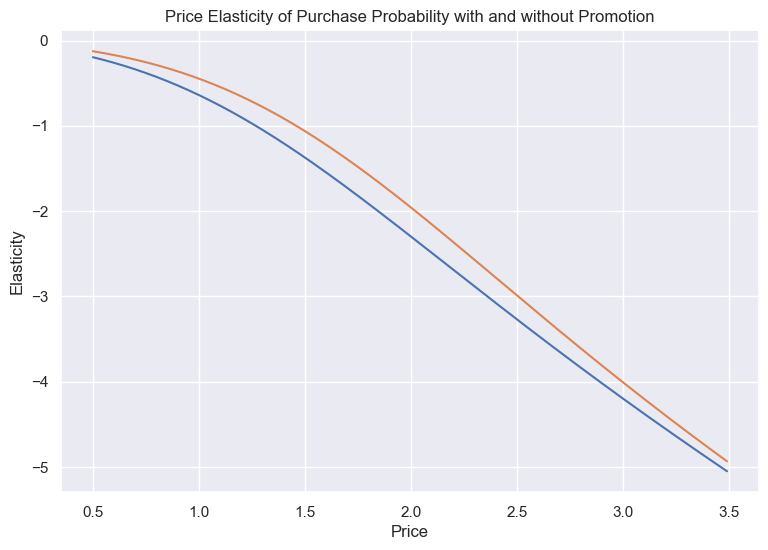

In [223]:
plt.figure(figsize = (9,6))
plt.plot(price_range, price_elasticity_no_promo)
plt.plot(price_range, price_elasticity_promo)
plt.xlabel('Price')
plt.ylabel('Elasticity')
plt.title('Price Elasticity of Purchase Probability with and without Promotion')

Brand Choice

data prep

In [224]:
brand_choice = df_pa[df_pa['Incidence'] == 1]

In [225]:
pd.options.display.max_rows = 100
brand_choice

,ID,Day,Incidence,Brand,Quantity,Last_Inc_Brand,Last_Inc_Quantity,Price_1,Price_2,Price_3,...,Age,Education,Income,Occupation,Settlement size,Segment,Segment_0,Segment_1,Segment_2,Segment_3
6,200000001,28,1,2,2,0,0,1.50,1.90,1.99,...,47,1,110866,1,0,2,0,0,1,0
11,200000001,58,1,5,1,0,0,1.39,1.90,1.91,...,47,1,110866,1,0,2,0,0,1,0
19,200000001,110,1,1,2,0,0,1.47,1.90,1.99,...,47,1,110866,1,0,2,0,0,1,0
24,200000001,142,1,4,1,0,0,1.21,1.35,1.99,...,47,1,110866,1,0,2,0,0,1,0
29,200000001,183,1,2,3,0,0,1.46,1.88,1.97,...,47,1,110866,1,0,2,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58621,200000500,296,1,2,6,0,0,1.48,1.89,2.01,...,42,1,120946,1,0,2,0,0,1,0
58648,200000500,460,1,1,12,0,0,1.35,1.57,2.02,...,42,1,120946,1,0,2,0,0,1,0
58674,200000500,641,1,2,7,0,0,1.50,1.85,2.06,...,42,1,120946,1,0,2,0,0,1,0
58687,200000500,697,1,2,6,0,0,1.42,1.51,1.97,...,42,1,120946,1,0,2,0,0,1,0


In [226]:
Y = brand_choice['Brand']

In [228]:
brand_choice.columns.values

array(['ID', 'Day', 'Incidence', 'Brand', 'Quantity', 'Last_Inc_Brand',
       'Last_Inc_Quantity', 'Price_1', 'Price_2', 'Price_3', 'Price_4',
       'Price_5', 'Promotion_1', 'Promotion_2', 'Promotion_3',
       'Promotion_4', 'Promotion_5', 'Sex', 'Marital status', 'Age',
       'Education', 'Income', 'Occupation', 'Settlement size', 'Segment',
       'Segment_0', 'Segment_1', 'Segment_2', 'Segment_3'], dtype=object)

In [229]:
features = ['Price_1', 'Price_2', 'Price_3','Price_4','Price_5']
X = brand_choice[features]

In [232]:
model_brand_choice = LogisticRegression(solver = 'sag', multi_class = 'multinomial')
model_brand_choice.fit(X,Y)

LogisticRegression(multi_class='multinomial', solver='sag')

In [236]:
model_brand_choice.coef_

array([[-3.9159654 ,  0.65845392,  2.41769474,  0.70407491, -0.20211672],
       [ 1.27460331, -1.8798589 , -0.21267958, -0.20634736,  0.58786176],
       [ 1.62422585,  0.56212887,  0.50102001,  1.03953813,  0.45282325],
       [ 0.57452547,  0.39558219, -1.40065137, -1.2462514 ,  0.24933932],
       [ 0.44261077,  0.26369392, -1.3053838 , -0.29101428, -1.0879076 ]])

In [237]:
bc_coef = pd.DataFrame(model_brand_choice.coef_)
bc_coef

,0,1,2,3,4
0,-3.915965,0.658454,2.417695,0.704075,-0.202117
1,1.274603,-1.879859,-0.212680,-0.206347,0.587862
2,1.624226,0.562129,0.501020,1.039538,0.452823
3,0.574525,0.395582,-1.400651,-1.246251,0.249339
4,0.442611,0.263694,-1.305384,-0.291014,-1.087908


In [240]:
bc_coef = pd.DataFrame(np.transpose(model_brand_choice.coef_))
coefficients = ['Coef_Brand_1','Coef_Brand_2','Coef_Brand_3','Coef_Brand_4','Coef_Brand_5']
bc_coef.columns = [coefficients]
prices = ['Price_1','Price_2','Price_3','Price_4','Price_5']
bc_coef.index = [prices]
bc_coef = bc_coef.round(2)
bc_coef

,Coef_Brand_1,Coef_Brand_2,Coef_Brand_3,Coef_Brand_4,Coef_Brand_5
Price_1,-3.92,1.27,1.62,0.57,0.44
Price_2,0.66,-1.88,0.56,0.40,0.26
Price_3,2.42,-0.21,0.50,-1.40,-1.31
Price_4,0.70,-0.21,1.04,-1.25,-0.29
Price_5,-0.20,0.59,0.45,0.25,-1.09


In [241]:
#Own Brand & Cross Brand Effects
#The marketing mix tool for that brand reflects choice probability is dependent on the other brands 

Own Price Elasticity Brand 5

In [244]:
#predict price based on price range
df_own_brand_5 = pd.DataFrame(index = np.arange(price_range.size))
df_own_brand_5['Price_1'] = brand_choice['Price_1'].mean()
df_own_brand_5['Price_2'] = brand_choice['Price_2'].mean()
df_own_brand_5['Price_3'] = brand_choice['Price_3'].mean()
df_own_brand_5['Price_4'] = brand_choice['Price_4'].mean()
df_own_brand_5['Price_5'] = price_range
df_own_brand_5

,Price_1,Price_2,Price_3,Price_4,Price_5
0,1.384559,1.764717,2.006694,2.159658,0.50
1,1.384559,1.764717,2.006694,2.159658,0.51
2,1.384559,1.764717,2.006694,2.159658,0.52
3,1.384559,1.764717,2.006694,2.159658,0.53
4,1.384559,1.764717,2.006694,2.159658,0.54
...,...,...,...,...,...
295,1.384559,1.764717,2.006694,2.159658,3.45
296,1.384559,1.764717,2.006694,2.159658,3.46
297,1.384559,1.764717,2.006694,2.159658,3.47
298,1.384559,1.764717,2.006694,2.159658,3.48


In [245]:
# Predicting purchase probability for brand 5 based on the change in the prices 

In [246]:
predict_brand_5 = model_brand_choice.predict_proba(df_own_brand_5)

In [247]:
pr_own_brand_5 = predict_brand_5[: ][:, 4]

In [249]:
beta5 = bc_coef.iloc[4,4]
beta5

-1.09

In [250]:
own_price_elasticity_brand_5 = beta5 * price_range * (1 - pr_own_brand_5 )

In [251]:
df_price_elasticities['Brand_5'] = own_price_elasticity_brand_5
pd.options.display.max_rows = None
df_price_elasticities

,Price_Point,Mean_PE,PE_Segment_1,PE_Segment_2,PE_Segment_3,PE_Segment_0,Elasticity_Promotion_1,Elasticity_no_Promotion,Elasticity_Promotion_0,Brand_5
0,0.50,-0.096382,-0.118839,-0.030914,-0.168041,-0.211156,-0.125720,-0.195640,-0.195640,-0.049055
1,0.51,-0.100449,-0.123006,-0.032680,-0.172966,-0.217725,-0.129835,-0.201760,-0.201760,-0.050616
2,0.52,-0.104643,-0.127267,-0.034533,-0.177961,-0.224403,-0.134030,-0.207984,-0.207984,-0.052206
3,0.53,-0.108967,-0.131621,-0.036478,-0.183027,-0.231189,-0.138304,-0.214311,-0.214311,-0.053827
4,0.54,-0.113425,-0.136071,-0.038517,-0.188164,-0.238084,-0.142660,-0.220742,-0.220742,-0.055477
5,0.55,-0.118019,-0.140617,-0.040654,-0.193373,-0.245089,-0.147097,-0.227277,-0.227277,-0.057158
6,0.56,-0.122753,-0.145263,-0.042896,-0.198654,-0.252205,-0.151617,-0.233919,-0.233919,-0.058870
7,0.57,-0.127631,-0.150008,-0.045245,-0.204009,-0.259432,-0.156221,-0.240667,-0.240667,-0.060614
8,0.58,-0.132655,-0.154855,-0.047707,-0.209436,-0.266772,-0.160910,-0.247522,-0.247522,-0.062391
9,0.59,-0.137829,-0.159805,-0.050286,-0.214937,-0.274224,-0.165685,-0.254485,-0.254485,-0.064199


Text(0.5, 1.0, 'Own Price Elasticity of Purchase Probability for Brand 5')

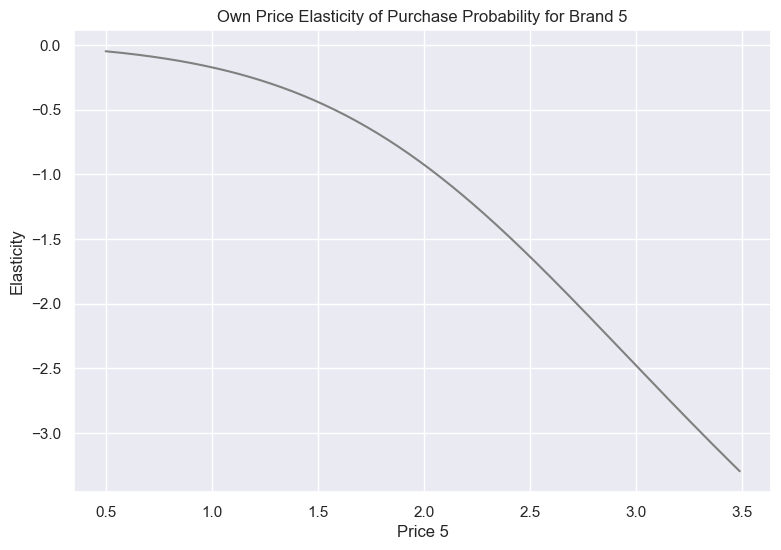

In [252]:
plt.figure(figsize = (9,6))
plt.plot(price_range, own_price_elasticity_brand_5, color = 'grey')
plt.xlabel('Price 5')
plt.ylabel('Elasticity')
plt.title('Own Price Elasticity of Purchase Probability for Brand 5')

Cross Price Elasticity Brand 5, Cross Brand 4

In [254]:
df_brand5_cross_brand4 = pd.DataFrame(index = np.arange(price_range.size))
df_brand5_cross_brand4['Price_1'] = brand_choice['Price_1'].mean()
df_brand5_cross_brand4['Price_2'] = brand_choice['Price_2'].mean()
df_brand5_cross_brand4['Price_3'] = brand_choice['Price_3'].mean()
df_brand5_cross_brand4['Price_4'] = price_range
df_brand5_cross_brand4['Price_5'] = brand_choice['Price_5'].mean()

In [255]:
df_brand5_cross_brand4.head()

,Price_1,Price_2,Price_3,Price_4,Price_5
0,1.384559,1.764717,2.006694,0.50,2.654296
1,1.384559,1.764717,2.006694,0.51,2.654296
2,1.384559,1.764717,2.006694,0.52,2.654296
3,1.384559,1.764717,2.006694,0.53,2.654296
4,1.384559,1.764717,2.006694,0.54,2.654296


In [256]:
predict_brand5_cross_brand4 = model_brand_choice.predict_proba(df_brand5_cross_brand4)

In [257]:
# E = -beta(own price)*price(cross brand)*Pr(cross brand) 

In [258]:
pr_brand_4 = predict_brand5_cross_brand4[:][:, 3]

In [259]:
beta5

-1.09

In [265]:
brand5_cross_brand4_price_elasticity = -beta5 * price_range * pr_brand_4

In [266]:
df_price_elasticities['brand5_cross_brand_4'] = brand5_cross_brand4_price_elasticity
df_price_elasticities

,Price_Point,Mean_PE,PE_Segment_1,PE_Segment_2,PE_Segment_3,PE_Segment_0,Elasticity_Promotion_1,Elasticity_no_Promotion,Elasticity_Promotion_0,Brand_5,brand5_cross_brand_4
0,0.50,-0.096382,-0.118839,-0.030914,-0.168041,-0.211156,-0.125720,-0.195640,-0.195640,-0.049055,0.332012
1,0.51,-0.100449,-0.123006,-0.032680,-0.172966,-0.217725,-0.129835,-0.201760,-0.201760,-0.050616,0.337288
2,0.52,-0.104643,-0.127267,-0.034533,-0.177961,-0.224403,-0.134030,-0.207984,-0.207984,-0.052206,0.342507
3,0.53,-0.108967,-0.131621,-0.036478,-0.183027,-0.231189,-0.138304,-0.214311,-0.214311,-0.053827,0.347669
4,0.54,-0.113425,-0.136071,-0.038517,-0.188164,-0.238084,-0.142660,-0.220742,-0.220742,-0.055477,0.352773
5,0.55,-0.118019,-0.140617,-0.040654,-0.193373,-0.245089,-0.147097,-0.227277,-0.227277,-0.057158,0.357820
6,0.56,-0.122753,-0.145263,-0.042896,-0.198654,-0.252205,-0.151617,-0.233919,-0.233919,-0.058870,0.362810
7,0.57,-0.127631,-0.150008,-0.045245,-0.204009,-0.259432,-0.156221,-0.240667,-0.240667,-0.060614,0.367741
8,0.58,-0.132655,-0.154855,-0.047707,-0.209436,-0.266772,-0.160910,-0.247522,-0.247522,-0.062391,0.372615
9,0.59,-0.137829,-0.159805,-0.050286,-0.214937,-0.274224,-0.165685,-0.254485,-0.254485,-0.064199,0.377430


Text(0.5, 1.0, 'Cross Price Elasticity of Brand 5 wrt Brand 4')

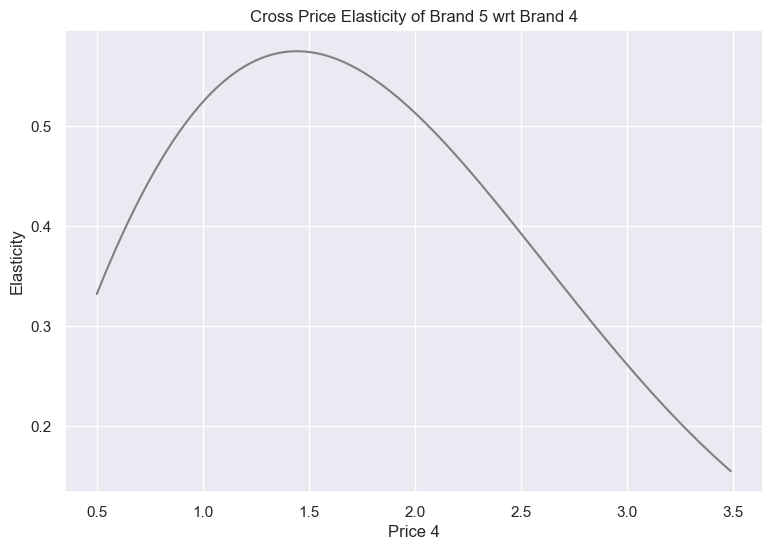

In [267]:
plt.figure(figsize = (9,6))
plt.plot(price_range,brand5_cross_brand4_price_elasticity , color = 'grey')
plt.xlabel('Price 4')
plt.ylabel('Elasticity')
plt.title('Cross Price Elasticity of Brand 5 wrt Brand 4')

Own and Cross-Price Elasticity by Segment

Well-Off

In [268]:
brand_choice_s3 = df_pa[df_pa['Incidence'] == 1]
brand_choice_s3 = brand_choice_s3[brand_choice_s3['Segment'] == 3]

pd.options.display.max_rows = 100
brand_choice_s3

,ID,Day,Incidence,Brand,Quantity,Last_Inc_Brand,Last_Inc_Quantity,Price_1,Price_2,Price_3,...,Age,Education,Income,Occupation,Settlement size,Segment,Segment_0,Segment_1,Segment_2,Segment_3
101,200000002,6,1,4,1,0,0,1.59,1.87,2.01,...,52,2,159052,2,1,3,0,0,0,1
115,200000002,100,1,4,2,0,0,1.47,1.90,1.95,...,52,2,159052,2,1,3,0,0,0,1
138,200000002,283,1,4,3,0,0,1.37,1.89,2.00,...,52,2,159052,2,1,3,0,0,0,1
141,200000002,307,1,4,1,0,0,1.34,1.89,2.01,...,52,2,159052,2,1,3,0,0,0,1
153,200000002,422,1,4,1,0,0,1.34,1.89,2.02,...,52,2,159052,2,1,3,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57346,200000489,687,1,4,1,4,1,1.50,1.87,2.06,...,44,2,193816,2,1,3,0,0,0,1
57347,200000489,693,1,4,2,4,1,1.42,1.51,2.02,...,44,2,193816,2,1,3,0,0,0,1
57348,200000489,701,1,4,3,4,1,1.42,1.85,1.99,...,44,2,193816,2,1,3,0,0,0,1
57350,200000489,715,1,4,2,0,0,1.50,1.80,2.09,...,44,2,193816,2,1,3,0,0,0,1


In [269]:
# Brand Choice Model estimation.
Y = brand_choice_s3['Brand']
brand_choice_s3 = pd.get_dummies(brand_choice_s3, columns=['Brand'], prefix = 'Brand', prefix_sep = '_')
X = brand_choice_s3[features]
model_brand_choice_s3 = LogisticRegression(solver = 'sag', multi_class = 'multinomial', max_iter = 300)
model_brand_choice_s3.fit(X, Y)

# Coefficients table for segment 3
bc_coef = pd.DataFrame(np.transpose(model_brand_choice_s3.coef_))
bc_coef.columns = [coefficients]
bc_coef.index = [prices]
bc_coef = bc_coef.round(2)
bc_coef

,Coef_Brand_1,Coef_Brand_2,Coef_Brand_3,Coef_Brand_4,Coef_Brand_5
Price_1,-2.15,1.33,0.82,0.12,-0.11
Price_2,-0.96,-1.38,1.29,0.78,0.27
Price_3,2.01,-1.65,-0.49,0.03,0.11
Price_4,2.52,0.96,-0.25,-1.90,-1.33
Price_5,-0.99,-0.30,1.17,0.56,-0.44


Own Brand Price Elasticity


In [270]:
# Calculating own-brand price elasticity for brand 5 and the Well-off segment.
df_own_brand_5_s3 = pd.DataFrame(index = np.arange(price_range.size))
df_own_brand_5_s3['Price_1'] = brand_choice_s3['Price_1'].mean()
df_own_brand_5_s3['Price_2'] = brand_choice_s3['Price_2'].mean()
df_own_brand_5_s3['Price_3'] = brand_choice_s3['Price_3'].mean()
df_own_brand_5_s3['Price_4'] = brand_choice_s3['Price_4'].mean()
df_own_brand_5_s3['Price_5'] = price_range

predict_own_brand_5_s3 = model_brand_choice_s3.predict_proba(df_own_brand_5_s3)
pr_own_brand_5_s3 = predict_own_brand_5_s3[: ][: , 4]

own_price_elasticity_brand_5_s3 =  beta5 * price_range * (1 - pr_own_brand_5_s3)
df_price_elasticities['Brand 5 S3'] = own_price_elasticity_brand_5_s3

Cross Brand Price Elasticity

In [271]:
# Calculating cross-brand price elasticity for brand 5 with respect to brand 4 for the Well-off segment.
df_brand5_cross_brand4_s3 = pd.DataFrame(index = np.arange(price_range.size))
df_brand5_cross_brand4_s3['Price_1'] = brand_choice_s3['Price_1'].mean()
df_brand5_cross_brand4_s3['Price_2'] = brand_choice_s3['Price_2'].mean()
df_brand5_cross_brand4_s3['Price_3'] = brand_choice_s3['Price_3'].mean()
df_brand5_cross_brand4_s3['Price_4'] = price_range
df_brand5_cross_brand4_s3['Price_5'] = brand_choice_s3['Price_5'].mean()

predict_brand5_cross_brand4_s3 = model_brand_choice_s3.predict_proba(df_brand5_cross_brand4_s3)
pr_cross_brand_5_s3 = predict_brand5_cross_brand4_s3[: ][: , 3]

# Update master data frame to include the newly obtained cross-brand price elasticities.
brand5_cross_brand4_price_elasticity_s3 = -beta5 * price_range * pr_cross_brand_5_s3
df_price_elasticities['Brand_5_Cross_Brand_4_S3'] = brand5_cross_brand4_price_elasticity_s3
pd.options.display.max_rows = None
df_price_elasticities

,Price_Point,Mean_PE,PE_Segment_1,PE_Segment_2,PE_Segment_3,PE_Segment_0,Elasticity_Promotion_1,Elasticity_no_Promotion,Elasticity_Promotion_0,Brand_5,brand5_cross_brand_4,Brand 5 S3,Brand_5_Cross_Brand_4_S3
0,0.50,-0.096382,-0.118839,-0.030914,-0.168041,-0.211156,-0.125720,-0.195640,-0.195640,-0.049055,0.332012,-0.297296,0.482420
1,0.51,-0.100449,-0.123006,-0.032680,-0.172966,-0.217725,-0.129835,-0.201760,-0.201760,-0.050616,0.337288,-0.303342,0.491726
2,0.52,-0.104643,-0.127267,-0.034533,-0.177961,-0.224403,-0.134030,-0.207984,-0.207984,-0.052206,0.342507,-0.309398,0.501015
3,0.53,-0.108967,-0.131621,-0.036478,-0.183027,-0.231189,-0.138304,-0.214311,-0.214311,-0.053827,0.347669,-0.315465,0.510289
4,0.54,-0.113425,-0.136071,-0.038517,-0.188164,-0.238084,-0.142660,-0.220742,-0.220742,-0.055477,0.352773,-0.321543,0.519547
5,0.55,-0.118019,-0.140617,-0.040654,-0.193373,-0.245089,-0.147097,-0.227277,-0.227277,-0.057158,0.357820,-0.327632,0.528790
6,0.56,-0.122753,-0.145263,-0.042896,-0.198654,-0.252205,-0.151617,-0.233919,-0.233919,-0.058870,0.362810,-0.333733,0.538016
7,0.57,-0.127631,-0.150008,-0.045245,-0.204009,-0.259432,-0.156221,-0.240667,-0.240667,-0.060614,0.367741,-0.339847,0.547226
8,0.58,-0.132655,-0.154855,-0.047707,-0.209436,-0.266772,-0.160910,-0.247522,-0.247522,-0.062391,0.372615,-0.345973,0.556420
9,0.59,-0.137829,-0.159805,-0.050286,-0.214937,-0.274224,-0.165685,-0.254485,-0.254485,-0.064199,0.377430,-0.352112,0.565597


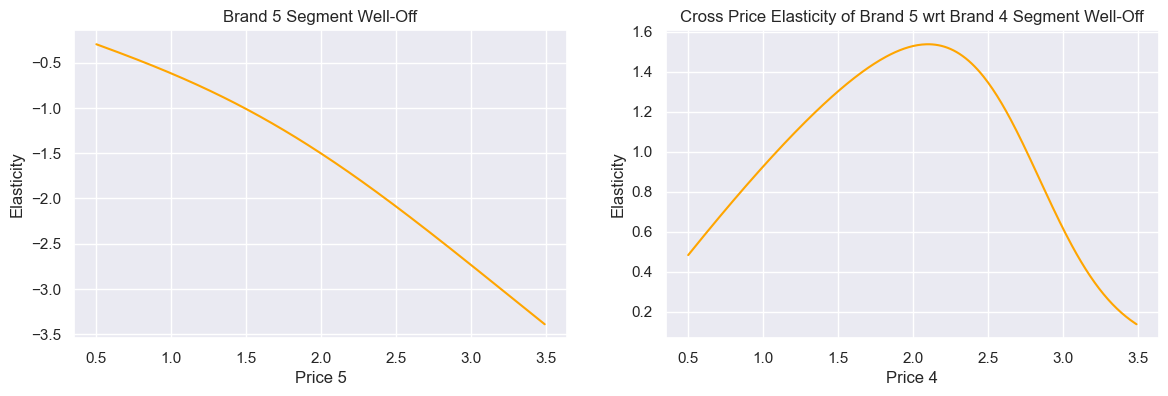

In [273]:
# Using a figure with axes we plot the own brand and cross-brand price elasticities for brand 5 cross brand 4 side by side.
fig, axs = plt.subplots(1, 2, figsize = (14, 4))
axs[0].plot(price_range, own_price_elasticity_brand_5_s3, color = 'orange')
axs[0].set_title('Brand 5 Segment Well-Off')
axs[0].set_xlabel('Price 5')

axs[1].plot(price_range, brand5_cross_brand4_price_elasticity_s3, color = 'orange')
axs[1].set_title('Cross Price Elasticity of Brand 5 wrt Brand 4 Segment Well-Off')
axs[1].set_xlabel('Price 4')

for ax in axs.flat:
    ax.set(ylabel = 'Elasticity')

Standard

In [274]:
brand_choice_s0 = df_pa[df_pa['Incidence'] == 1]
brand_choice_s0 = brand_choice_s0[brand_choice_s0['Segment'] == 0]
brand_choice_s0.head()

,ID,Day,Incidence,Brand,Quantity,Last_Inc_Brand,Last_Inc_Quantity,Price_1,Price_2,Price_3,...,Age,Education,Income,Occupation,Settlement size,Segment,Segment_0,Segment_1,Segment_2,Segment_3
2398,200000024,44,1,2,2,0,0,1.35,1.58,1.97,...,32,1,88428,0,0,0,1,0,0,0
2403,200000024,98,1,2,2,0,0,1.47,1.90,1.95,...,32,1,88428,0,0,0,1,0,0,0
2408,200000024,143,1,2,3,0,0,1.21,1.35,1.99,...,32,1,88428,0,0,0,1,0,0,0
2410,200000024,162,1,2,5,0,0,1.39,1.90,1.94,...,32,1,88428,0,0,0,1,0,0,0
2417,200000024,217,1,5,1,0,0,1.34,1.89,1.99,...,32,1,88428,0,0,0,1,0,0,0


In [275]:
# Brand Choice Model estimation.
Y = brand_choice_s0['Brand']
brand_choice_s0 = pd.get_dummies(brand_choice_s0, columns=['Brand'], prefix = 'Brand', prefix_sep = '_')
X = brand_choice_s0[features]
model_brand_choice_s0 = LogisticRegression(solver = 'sag', multi_class = 'multinomial', max_iter = 200)
model_brand_choice_s0.fit(X, Y)

# Coefficients table segment 0.
bc_coef = pd.DataFrame(np.transpose(model_brand_choice_s0.coef_))
bc_coef.columns = [coefficients]
bc_coef.index = [prices]
bc_coef = bc_coef.round(2)

Own brand Price Elasticity

In [276]:
# Calculating own-brand price elasticity for brand 5 and the Standard segment.
df_own_brand_5_s0 = pd.DataFrame(index = np.arange(price_range.size))
df_own_brand_5_s0['Price_1'] = brand_choice_s0['Price_1'].mean()
df_own_brand_5_s0['Price_2'] = brand_choice_s0['Price_2'].mean()
df_own_brand_5_s0['Price_3'] = brand_choice_s0['Price_3'].mean()
df_own_brand_5_s0['Price_4'] = brand_choice_s0['Price_4'].mean()
df_own_brand_5_s0['Price_5'] = price_range

predict_own_brand_5_s0 = model_brand_choice_s0.predict_proba(df_own_brand_5_s0)
pr_own_brand_5_s0 = predict_own_brand_5_s0[: ][: , 4]

# Compute price elasticities and update master data frame.
# We'd like to include the elasticities for the segments in order from 0 to three, which is why we use insert() on position 10.
own_price_elasticity_brand_5_s0 =  beta5 * price_range * (1 - pr_own_brand_5_s0)
df_price_elasticities.insert(10, column = 'Brand 5 S0', value = own_price_elasticity_brand_5_s0)

Cross Brand Price Elasticity

In [277]:
# Calculating cross-brand price elasticity for brand 5 with respect to brand 4 for the Standard segment.
df_brand5_cross_brand4_s0 = pd.DataFrame(index = np.arange(price_range.size))
df_brand5_cross_brand4_s0['Price_1'] = brand_choice_s0['Price_1'].mean()
df_brand5_cross_brand4_s0['Price_2'] = brand_choice_s0['Price_2'].mean()
df_brand5_cross_brand4_s0['Price_3'] = brand_choice_s0['Price_3'].mean()
df_brand5_cross_brand4_s0['Price_4'] = price_range
df_brand5_cross_brand4_s0['Price_5'] = brand_choice_s0['Price_5'].mean()

predict_brand5_cross_brand4_s0 = model_brand_choice_s0.predict_proba(df_brand5_cross_brand4_s0)
pr_cross_brand_5_s0 = predict_brand5_cross_brand4_s0[: ][: , 3]

# Compute price elasticities and update master data frame.
# We need to use insert() on position 11, to save the price elasticities in the correct order.
brand5_cross_brand4_price_elasticity_s0 = -beta5 * price_range * pr_cross_brand_5_s0
df_price_elasticities.insert(11, column = 'Brand_5_Cross_Brand_4_S0', value = brand5_cross_brand4_price_elasticity_s0)

Career - Focused

In [278]:
# Filter data by the Career-focused segment, which is the first segment.
brand_choice_s1 = df_pa[df_pa['Incidence'] == 1]
brand_choice_s1 = brand_choice_s1[brand_choice_s1['Segment'] == 1]

In [279]:
# Brand Choice Model estimation.
Y = brand_choice_s1['Brand']
brand_choice_s1 = pd.get_dummies(brand_choice_s1, columns=['Brand'], prefix = 'Brand', prefix_sep = '_')
X = brand_choice_s1[features]
model_brand_choice_s1 = LogisticRegression(solver = 'sag', multi_class = 'multinomial', max_iter = 300)
model_brand_choice_s1.fit(X, Y)

# Coefficients table segment 1
bc_coef = pd.DataFrame(np.transpose(model_brand_choice_s1.coef_))
bc_coef.columns = [coefficients]
bc_coef.index = [prices]
bc_coef = bc_coef.round(2)

Own Brand Price Elasticity

In [280]:
# Calculating own-brand price elasticity for brand 5 and the Career-focused segment.
df_own_brand_5_s1 = pd.DataFrame(index = np.arange(price_range.size))
df_own_brand_5_s1['Price_1'] = brand_choice_s1['Price_1'].mean()
df_own_brand_5_s1['Price_2'] = brand_choice_s1['Price_2'].mean()
df_own_brand_5_s1['Price_3'] = brand_choice_s1['Price_3'].mean()
df_own_brand_5_s1['Price_4'] = brand_choice_s1['Price_4'].mean()
df_own_brand_5_s1['Price_5'] = price_range

predict_own_brand_5_s1 = model_brand_choice_s1.predict_proba(df_own_brand_5_s1)
pr_own_brand_5_s1 = predict_own_brand_5_s1[: ][: , 4]

#compute price elasticities and update data frame
own_price_elasticity_brand_5_s1 =  beta5 * price_range * (1 - pr_own_brand_5_s1)
df_price_elasticities.insert(12, column = 'Brand 5 S1', value = own_price_elasticity_brand_5_s1)

Cross Brand Price Elasticity

In [281]:
# Calculating cross-brand price elasticity for brand 5 with respect to brand 4 for the Career-focused segment.
df_brand5_cross_brand4_s1 = pd.DataFrame(index = np.arange(price_range.size))
df_brand5_cross_brand4_s1['Price_1'] = brand_choice_s1['Price_1'].mean()
df_brand5_cross_brand4_s1['Price_2'] = brand_choice_s1['Price_2'].mean()
df_brand5_cross_brand4_s1['Price_3'] = brand_choice_s1['Price_3'].mean()
df_brand5_cross_brand4_s1['Price_4'] = price_range
df_brand5_cross_brand4_s1['Price_5'] = brand_choice_s1['Price_5'].mean()

predict_brand5_cross_brand4_s1 = model_brand_choice_s1.predict_proba(df_brand5_cross_brand4_s1)
pr_cross_brand_5_s1 = predict_brand5_cross_brand4_s1[: ][: , 3]

brand5_cross_brand4_price_elasticity_s1 = -beta5 * price_range * pr_cross_brand_5_s1
df_price_elasticities.insert(13, column = 'Brand_5_Cross_Brand_4_S1', value = brand5_cross_brand4_price_elasticity_s1)

Fewer-Opportunities

In [282]:
# Filter data, select only purchases from segment 2, which is the Fewer-Opportunities segment.
brand_choice_s2 = df_pa[df_pa['Incidence'] == 1]
brand_choice_s2 = brand_choice_s2[brand_choice_s2['Segment'] == 2]

In [283]:
# Brand Choice Model estimation.
Y = brand_choice_s2['Brand']
brand_choice_s2 = pd.get_dummies(brand_choice_s2, columns=['Brand'], prefix = 'Brand', prefix_sep = '_')
X = brand_choice_s2[features]
model_brand_choice_s2 = LogisticRegression(solver = 'sag', multi_class = 'multinomial', max_iter = 300)
model_brand_choice_s2.fit(X, Y)

# Coefficients table segment 2
bc_coef = pd.DataFrame(np.transpose(model_brand_choice_s2.coef_))
bc_coef.columns = [coefficients]
bc_coef.index = [prices]
bc_coef = bc_coef.round(2)

Own Brand Price Elasticity

In [284]:
# Calculating own-brand price elasticity for brand 5 and the Fewer-opportunities segment.
df_own_brand_5_s2 = pd.DataFrame(index = np.arange(price_range.size))
df_own_brand_5_s2['Price_1'] = brand_choice_s2['Price_1'].mean()
df_own_brand_5_s2['Price_2'] = brand_choice_s2['Price_2'].mean()
df_own_brand_5_s2['Price_3'] = brand_choice_s2['Price_3'].mean()
df_own_brand_5_s2['Price_4'] = brand_choice_s2['Price_4'].mean()
df_own_brand_5_s2['Price_5'] = price_range

predict_own_brand_5_s2 = model_brand_choice_s2.predict_proba(df_own_brand_5_s2)
pr_own_brand_5_s2 = predict_own_brand_5_s2[: ][: , 4]

#compute price elasticities and update data frame
own_price_elasticity_brand_5_s2 =  beta5 * price_range * (1 - pr_own_brand_5_s2)
df_price_elasticities.insert(14, column = 'Brand 5 S2', value = own_price_elasticity_brand_5_s2)

Cross Brand Price Elasticity

In [285]:
# Calculating cross-brand price elasticity for brand 5 with respect to brand 4 for the Fewer-opportunities segment.
df_brand5_cross_brand4_s2 = pd.DataFrame(index = np.arange(price_range.size))
df_brand5_cross_brand4_s2['Price_1'] = brand_choice_s2['Price_1'].mean()
df_brand5_cross_brand4_s2['Price_2'] = brand_choice_s2['Price_2'].mean()
df_brand5_cross_brand4_s2['Price_3'] = brand_choice_s2['Price_3'].mean()
df_brand5_cross_brand4_s2['Price_4'] = price_range
df_brand5_cross_brand4_s2['Price_5'] = brand_choice_s2['Price_5'].mean()

predict_brand5_cross_brand4_s2 = model_brand_choice_s2.predict_proba(df_brand5_cross_brand4_s2)
pr_cross_brand_5_s2 = predict_brand5_cross_brand4_s2[: ][: , 3]

brand5_cross_brand4_price_elasticity_s2 = -beta5 * price_range * pr_cross_brand_5_s2
df_price_elasticities.insert(15, column = 'Brand_5_Cross_Brand_4_S2', value = brand5_cross_brand4_price_elasticity_s2)
df_price_elasticities

,Price_Point,Mean_PE,PE_Segment_1,PE_Segment_2,PE_Segment_3,PE_Segment_0,Elasticity_Promotion_1,Elasticity_no_Promotion,Elasticity_Promotion_0,Brand_5,Brand 5 S0,Brand_5_Cross_Brand_4_S0,Brand 5 S1,Brand_5_Cross_Brand_4_S1,Brand 5 S2,Brand_5_Cross_Brand_4_S2,brand5_cross_brand_4,Brand 5 S3,Brand_5_Cross_Brand_4_S3
0,0.50,-0.096382,-0.118839,-0.030914,-0.168041,-0.211156,-0.125720,-0.195640,-0.195640,-0.049055,-0.115842,0.174130,-0.043940,0.194777,-0.001036,0.181597,0.332012,-0.297296,0.482420
1,0.51,-0.100449,-0.123006,-0.032680,-0.172966,-0.217725,-0.129835,-0.201760,-0.201760,-0.050616,-0.118881,0.176186,-0.045027,0.197261,-0.001098,0.183894,0.337288,-0.303342,0.491726
2,0.52,-0.104643,-0.127267,-0.034533,-0.177961,-0.224403,-0.134030,-0.207984,-0.207984,-0.052206,-0.121955,0.178190,-0.046123,0.199694,-0.001163,0.186142,0.342507,-0.309398,0.501015
3,0.53,-0.108967,-0.131621,-0.036478,-0.183027,-0.231189,-0.138304,-0.214311,-0.214311,-0.053827,-0.125065,0.180144,-0.047228,0.202077,-0.001231,0.188342,0.347669,-0.315465,0.510289
4,0.54,-0.113425,-0.136071,-0.038517,-0.188164,-0.238084,-0.142660,-0.220742,-0.220742,-0.055477,-0.128209,0.182048,-0.048343,0.204409,-0.001303,0.190492,0.352773,-0.321543,0.519547
5,0.55,-0.118019,-0.140617,-0.040654,-0.193373,-0.245089,-0.147097,-0.227277,-0.227277,-0.057158,-0.131390,0.183901,-0.049467,0.206691,-0.001378,0.192595,0.357820,-0.327632,0.528790
6,0.56,-0.122753,-0.145263,-0.042896,-0.198654,-0.252205,-0.151617,-0.233919,-0.233919,-0.058870,-0.134608,0.185705,-0.050601,0.208924,-0.001458,0.194650,0.362810,-0.333733,0.538016
7,0.57,-0.127631,-0.150008,-0.045245,-0.204009,-0.259432,-0.156221,-0.240667,-0.240667,-0.060614,-0.137862,0.187459,-0.051745,0.211107,-0.001541,0.196657,0.367741,-0.339847,0.547226
8,0.58,-0.132655,-0.154855,-0.047707,-0.209436,-0.266772,-0.160910,-0.247522,-0.247522,-0.062391,-0.141154,0.189165,-0.052898,0.213241,-0.001629,0.198617,0.372615,-0.345973,0.556420
9,0.59,-0.137829,-0.159805,-0.050286,-0.214937,-0.274224,-0.165685,-0.254485,-0.254485,-0.064199,-0.144484,0.190822,-0.054061,0.215327,-0.001722,0.200530,0.377430,-0.352112,0.565597


Text(0.5, 0, 'Price 4')

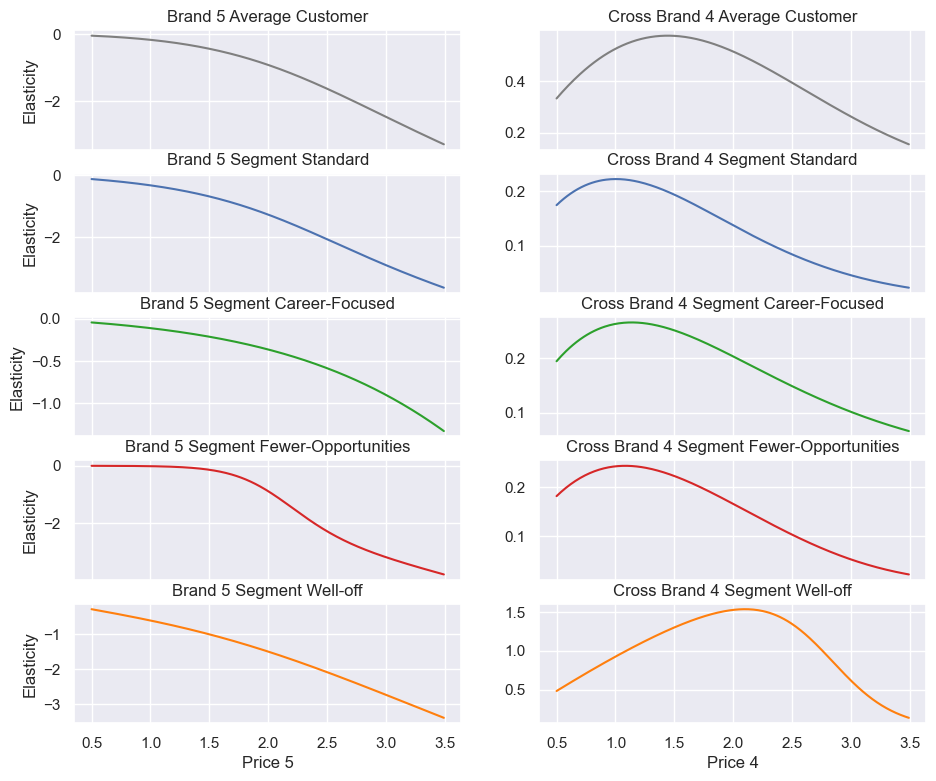

In [286]:
# We plot the own and cross brand price elasticities for the average customer and each of the four segments.
# We can observe differences and similiraties between the segments and examine their preference, when it comes to brand choice.
# The two segments, which seem to be of most interested for the marketing team of brand 5, seem to be the Career-focused
# and the Well-off. They are also the segments which purchase this brand most often. 
# The Career-focused segment is the most inelastic and they are the most loyal segment. 
# Based on our model, they do not seem to be that affected by price, therefore brand 5 could increase its price, 
# without fear of significant loss of customers from this segment. 
# The Well-off segment on the other hand, seems to be more elastic. They also purchase the competitor brand 4 most often.
# In order to target this segment, our analysis signals, that price needs to be decreased. However, keep in mind 
# that other factors aside from price might be influencing the purchase behaivour of this segment.
fig1, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(5, 2, figsize = (11, 9), sharex = True)
ax1[0].plot(price_range, own_price_elasticity_brand_5, 'tab:grey')
ax1[0].set_title('Brand 5 Average Customer')
ax1[0].set_ylabel('Elasticity')
ax1[1].plot(price_range, brand5_cross_brand4_price_elasticity, 'tab:grey')
ax1[1].set_title('Cross Brand 4 Average Customer')


ax2[0].plot(price_range, own_price_elasticity_brand_5_s0)
ax2[0].set_title('Brand 5 Segment Standard')
ax2[0].set_ylabel('Elasticity')
ax2[1].plot(price_range, brand5_cross_brand4_price_elasticity_s0)
ax2[1].set_title('Cross Brand 4 Segment Standard')

ax3[0].plot(price_range, own_price_elasticity_brand_5_s1, 'tab:green')
ax3[0].set_title('Brand 5 Segment Career-Focused')
ax3[0].set_ylabel('Elasticity')
ax3[1].plot(price_range, brand5_cross_brand4_price_elasticity_s1, 'tab:green')
ax3[1].set_title('Cross Brand 4 Segment Career-Focused')

ax4[0].plot(price_range, own_price_elasticity_brand_5_s2, 'tab:red')
ax4[0].set_title('Brand 5 Segment Fewer-Opportunities')
ax4[0].set_ylabel('Elasticity')
ax4[1].plot(price_range, brand5_cross_brand4_price_elasticity_s2, 'tab:red')
ax4[1].set_title('Cross Brand 4 Segment Fewer-Opportunities')

ax5[0].plot(price_range, own_price_elasticity_brand_5_s3, 'tab:orange')
ax5[0].set_title('Brand 5 Segment Well-off')
ax5[0].set_xlabel('Price 5')
ax5[0].set_ylabel('Elasticity')
ax5[1].plot(price_range, brand5_cross_brand4_price_elasticity_s3, 'tab:orange')
ax5[1].set_title('Cross Brand 4 Segment Well-off')
ax5[1].set_xlabel('Price 4')

Price Elasticity of Pirchase Quantity

In [288]:
# We want to determine price elasticity of purchase quantity, also known as price elasticity of demand.
# We are interested in purchase ocassion, where the purchased quantity is different from 0.
# Therefore, once again we filter our data to contain only shopping visits where the client has purchased at least one product.
df_purchase_quantity = df_pa[df_pa['Incidence'] == 1]
df_purchase_quantity.head()

,ID,Day,Incidence,Brand,Quantity,Last_Inc_Brand,Last_Inc_Quantity,Price_1,Price_2,Price_3,...,Age,Education,Income,Occupation,Settlement size,Segment,Segment_0,Segment_1,Segment_2,Segment_3
6,200000001,28,1,2,2,0,0,1.50,1.90,1.99,...,47,1,110866,1,0,2,0,0,1,0
11,200000001,58,1,5,1,0,0,1.39,1.90,1.91,...,47,1,110866,1,0,2,0,0,1,0
19,200000001,110,1,1,2,0,0,1.47,1.90,1.99,...,47,1,110866,1,0,2,0,0,1,0
24,200000001,142,1,4,1,0,0,1.21,1.35,1.99,...,47,1,110866,1,0,2,0,0,1,0
29,200000001,183,1,2,3,0,0,1.46,1.88,1.97,...,47,1,110866,1,0,2,0,0,1,0


In [289]:
# Create brand dummies, for each of the five brands.
df_purchase_quantity = pd.get_dummies(df_purchase_quantity, columns = ['Brand'], prefix = 'Brand', prefix_sep = '_')
# The descriptive analysis of the purchase quantitiy data frame, shows that quantity ranges from 1 to 15 
# and has an average value of 2.8, which means that more often than not our customers buy more than 1 chocolate candy bar.
df_purchase_quantity.describe()

,ID,Day,Incidence,Quantity,Last_Inc_Brand,Last_Inc_Quantity,Price_1,Price_2,Price_3,Price_4,...,Segment,Segment_0,Segment_1,Segment_2,Segment_3,Brand_1,Brand_2,Brand_3,Brand_4,Brand_5
count,1.463800e+04,14638.000000,14638.0,14638.000000,14638.000000,14638.000000,14638.000000,14638.000000,14638.000000,14638.000000,...,14638.000000,14638.000000,14638.000000,14638.000000,14638.000000,14638.000000,14638.000000,14638.000000,14638.000000,14638.000000
mean,2.000003e+08,359.607597,1.0,2.774559,1.535251,0.406955,1.384559,1.764717,2.006694,2.159658,...,1.581910,0.175229,0.299290,0.293824,0.231657,0.092226,0.310288,0.057453,0.199959,0.340074
std,1.423786e+02,205.346253,0.0,1.796736,2.060858,0.491283,0.090944,0.181667,0.046200,0.093253,...,1.028171,0.380176,0.457962,0.455528,0.421906,0.289354,0.462627,0.232714,0.399983,0.473750
min,2.000000e+08,1.000000,1.0,1.000000,0.000000,0.000000,1.100000,1.260000,1.870000,1.760000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000001e+08,175.000000,1.0,2.000000,0.000000,0.000000,1.340000,1.570000,1.970000,2.120000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2.000003e+08,355.000000,1.0,2.000000,0.000000,0.000000,1.390000,1.880000,2.010000,2.180000,...,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2.000004e+08,532.000000,1.0,3.000000,4.000000,1.000000,1.470000,1.890000,2.060000,2.240000,...,2.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000
max,2.000005e+08,727.000000,1.0,15.000000,5.000000,1.000000,1.590000,1.900000,2.140000,2.260000,...,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [290]:
# Here we make a decission on which features to include in our model. We decide to include a Price and a Promotion feature.
df_purchase_quantity.columns.values

array(['ID', 'Day', 'Incidence', 'Quantity', 'Last_Inc_Brand',
       'Last_Inc_Quantity', 'Price_1', 'Price_2', 'Price_3', 'Price_4',
       'Price_5', 'Promotion_1', 'Promotion_2', 'Promotion_3',
       'Promotion_4', 'Promotion_5', 'Sex', 'Marital status', 'Age',
       'Education', 'Income', 'Occupation', 'Settlement size', 'Segment',
       'Segment_0', 'Segment_1', 'Segment_2', 'Segment_3', 'Brand_1',
       'Brand_2', 'Brand_3', 'Brand_4', 'Brand_5'], dtype=object)

In [292]:
#Find the price of the product that is chosen at this incidence
df_purchase_quantity['Price_Incidence'] = (df_purchase_quantity['Brand_1'] * df_purchase_quantity['Price_1'] +
                                           df_purchase_quantity['Brand_2'] * df_purchase_quantity['Price_2'] +
                                           df_purchase_quantity['Brand_3'] * df_purchase_quantity['Price_3'] +
                                           df_purchase_quantity['Brand_4'] * df_purchase_quantity['Price_4'] +
                                           df_purchase_quantity['Brand_5'] * df_purchase_quantity['Price_5'] )

In [293]:
#Find the price of the product that is chosen at this incidence
df_purchase_quantity['Promotion_Incidence'] = (df_purchase_quantity['Brand_1'] * df_purchase_quantity['Promotion_1'] +
                                               df_purchase_quantity['Brand_2'] * df_purchase_quantity['Promotion_2'] +
                                               df_purchase_quantity['Brand_3'] * df_purchase_quantity['Promotion_3'] +
                                               df_purchase_quantity['Brand_4'] * df_purchase_quantity['Promotion_4'] +
                                               df_purchase_quantity['Brand_5'] * df_purchase_quantity['Promotion_5'] )

Model Estimation 

Linear Regression

In [294]:
X = df_purchase_quantity[['Price_Incidence', 'Promotion_Incidence']]
pd.options.display.max_rows = 100
X

,Price_Incidence,Promotion_Incidence
6,1.90,0
11,2.62,1
19,1.47,0
24,2.16,0
29,1.88,0
...,...,...
58621,1.89,0
58648,1.35,1
58674,1.85,1
58687,1.51,0


In [295]:
Y = df_purchase_quantity['Quantity']
Y.head()

6     2
11    1
19    2
24    1
29    3
Name: Quantity, dtype: int64

In [296]:
# Linear Regression Model
model_quantity = LinearRegression()
model_quantity.fit(X, Y)

LinearRegression()

In [297]:
# Linear Regression Model. The coefficients for price and promotion are both negative. 
# It appears that promotion reflects negatively on the purchase quantity of the average client, which is unexpected.
model_quantity.coef_

array([-0.8173651 , -0.10504673])

Price Elasticity Estimation

In [298]:
# We examine the price elasticity of purchase quantity with active promotional activities for each price point.
df_price_elasticity_quantity = pd.DataFrame(index = np.arange(price_range.size))
df_price_elasticity_quantity['Price_Incidence'] = price_range
df_price_elasticity_quantity['Promotion_Incidence'] = 1

In [299]:
#Take the coefficient for price.
beta_quantity = model_quantity.coef_[0]
beta_quantity

-0.8173651016684997

In [300]:
predict_quantity = model_quantity.predict(df_price_elasticity_quantity)

In [301]:
# We calculate the price elasticity with our new formula. It is the beta coefficient for price multiplied by price
# and divided by the purchase quantity.
price_elasticity_quantity_promotion_yes = beta_quantity * price_range / predict_quantity

In [302]:
df_price_elasticities['PE_Quantity_Promotion_1'] = price_elasticity_quantity_promotion_yes
df_price_elasticities

,Price_Point,Mean_PE,PE_Segment_1,PE_Segment_2,PE_Segment_3,PE_Segment_0,Elasticity_Promotion_1,Elasticity_no_Promotion,Elasticity_Promotion_0,Brand_5,Brand 5 S0,Brand_5_Cross_Brand_4_S0,Brand 5 S1,Brand_5_Cross_Brand_4_S1,Brand 5 S2,Brand_5_Cross_Brand_4_S2,brand5_cross_brand_4,Brand 5 S3,Brand_5_Cross_Brand_4_S3,PE_Quantity_Promotion_1
0,0.50,-0.096382,-0.118839,-0.030914,-0.168041,-0.211156,-0.125720,-0.195640,-0.195640,-0.049055,-0.115842,0.174130,-0.043940,0.194777,-0.001036,0.181597,0.332012,-0.297296,0.482420,-0.102157
1,0.51,-0.100449,-0.123006,-0.032680,-0.172966,-0.217725,-0.129835,-0.201760,-0.201760,-0.050616,-0.118881,0.176186,-0.045027,0.197261,-0.001098,0.183894,0.337288,-0.303342,0.491726,-0.104413
2,0.52,-0.104643,-0.127267,-0.034533,-0.177961,-0.224403,-0.134030,-0.207984,-0.207984,-0.052206,-0.121955,0.178190,-0.046123,0.199694,-0.001163,0.186142,0.342507,-0.309398,0.501015,-0.106679
3,0.53,-0.108967,-0.131621,-0.036478,-0.183027,-0.231189,-0.138304,-0.214311,-0.214311,-0.053827,-0.125065,0.180144,-0.047228,0.202077,-0.001231,0.188342,0.347669,-0.315465,0.510289,-0.108954
4,0.54,-0.113425,-0.136071,-0.038517,-0.188164,-0.238084,-0.142660,-0.220742,-0.220742,-0.055477,-0.128209,0.182048,-0.048343,0.204409,-0.001303,0.190492,0.352773,-0.321543,0.519547,-0.111238
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,3.45,-8.012537,-5.657094,-12.541244,-4.022355,-5.051452,-4.861062,-4.982879,-4.982879,-3.231574,-3.592456,0.024051,-1.287427,0.068590,-3.746081,0.023405,0.162232,-3.337315,0.157454,-1.774292
296,3.46,-8.037786,-5.677211,-12.578160,-4.037223,-5.068308,-4.879263,-4.999785,-4.999785,-3.247768,-3.606360,0.023695,-1.297236,0.067967,-3.757523,0.022945,0.160332,-3.350645,0.152033,-1.788634
297,3.47,-8.063001,-5.697292,-12.615059,-4.052075,-5.085145,-4.897434,-5.016670,-5.016670,-3.263930,-3.620221,0.023343,-1.307100,0.067349,-3.768945,0.022493,0.158446,-3.363973,0.146777,-1.803124
298,3.48,-8.088182,-5.717336,-12.651942,-4.066910,-5.101963,-4.915574,-5.033536,-5.033536,-3.280059,-3.634037,0.022995,-1.317019,0.066734,-3.780347,0.022047,0.156575,-3.377297,0.141683,-1.817766


Text(0.5, 1.0, 'Price Elasticity of Purchase Quantity with Promotion')

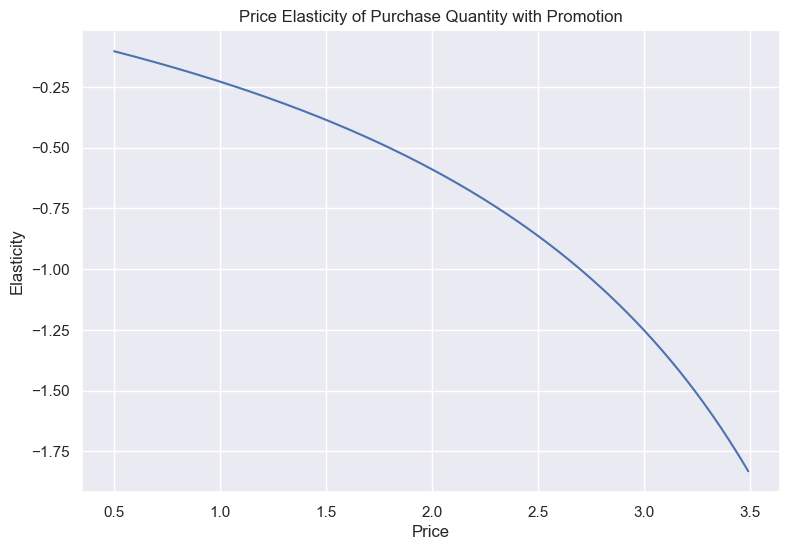

In [303]:
plt.figure(figsize = (9, 6))
plt.plot(price_range, price_elasticity_quantity_promotion_yes)
plt.xlabel('Price')
plt.ylabel('Elasticity')
plt.title('Price Elasticity of Purchase Quantity with Promotion')

Price Elasticity Without Promotion

In [304]:
 
# Here we assume there are no promotinal activities active for the entire price range.
df_price_elasticity_quantity['Promotion_Incidence'] = 0
# Find the new predicted quantities.
predict_quantity = model_quantity.predict(df_price_elasticity_quantity)
# Calculate the new price elasticities.
price_elasticity_quantity_promotion_no = beta_quantity * price_range / predict_quantity
# Add the results to the master data frame.
df_price_elasticities['PE_Quantity_Promotion_0'] = price_elasticity_quantity_promotion_no
df_price_elasticities

,Price_Point,Mean_PE,PE_Segment_1,PE_Segment_2,PE_Segment_3,PE_Segment_0,Elasticity_Promotion_1,Elasticity_no_Promotion,Elasticity_Promotion_0,Brand_5,...,Brand_5_Cross_Brand_4_S0,Brand 5 S1,Brand_5_Cross_Brand_4_S1,Brand 5 S2,Brand_5_Cross_Brand_4_S2,brand5_cross_brand_4,Brand 5 S3,Brand_5_Cross_Brand_4_S3,PE_Quantity_Promotion_1,PE_Quantity_Promotion_0
0,0.50,-0.096382,-0.118839,-0.030914,-0.168041,-0.211156,-0.125720,-0.195640,-0.195640,-0.049055,...,0.174130,-0.043940,0.194777,-0.001036,0.181597,0.332012,-0.297296,0.482420,-0.102157,-0.099543
1,0.51,-0.100449,-0.123006,-0.032680,-0.172966,-0.217725,-0.129835,-0.201760,-0.201760,-0.050616,...,0.176186,-0.045027,0.197261,-0.001098,0.183894,0.337288,-0.303342,0.491726,-0.104413,-0.101736
2,0.52,-0.104643,-0.127267,-0.034533,-0.177961,-0.224403,-0.134030,-0.207984,-0.207984,-0.052206,...,0.178190,-0.046123,0.199694,-0.001163,0.186142,0.342507,-0.309398,0.501015,-0.106679,-0.103939
3,0.53,-0.108967,-0.131621,-0.036478,-0.183027,-0.231189,-0.138304,-0.214311,-0.214311,-0.053827,...,0.180144,-0.047228,0.202077,-0.001231,0.188342,0.347669,-0.315465,0.510289,-0.108954,-0.106150
4,0.54,-0.113425,-0.136071,-0.038517,-0.188164,-0.238084,-0.142660,-0.220742,-0.220742,-0.055477,...,0.182048,-0.048343,0.204409,-0.001303,0.190492,0.352773,-0.321543,0.519547,-0.111238,-0.108369
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,3.45,-8.012537,-5.657094,-12.541244,-4.022355,-5.051452,-4.861062,-4.982879,-4.982879,-3.231574,...,0.024051,-1.287427,0.068590,-3.746081,0.023405,0.162232,-3.337315,0.157454,-1.774292,-1.664290
296,3.46,-8.037786,-5.677211,-12.578160,-4.037223,-5.068308,-4.879263,-4.999785,-4.999785,-3.247768,...,0.023695,-1.297236,0.067967,-3.757523,0.022945,0.160332,-3.350645,0.152033,-1.788634,-1.677205
297,3.47,-8.063001,-5.697292,-12.615059,-4.052075,-5.085145,-4.897434,-5.016670,-5.016670,-3.263930,...,0.023343,-1.307100,0.067349,-3.768945,0.022493,0.158446,-3.363973,0.146777,-1.803124,-1.690246
298,3.48,-8.088182,-5.717336,-12.651942,-4.066910,-5.101963,-4.915574,-5.033536,-5.033536,-3.280059,...,0.022995,-1.317019,0.066734,-3.780347,0.022047,0.156575,-3.377297,0.141683,-1.817766,-1.703414


Text(0.5, 1.0, 'Price Elasticity of Purchase Quantity with Promotion')

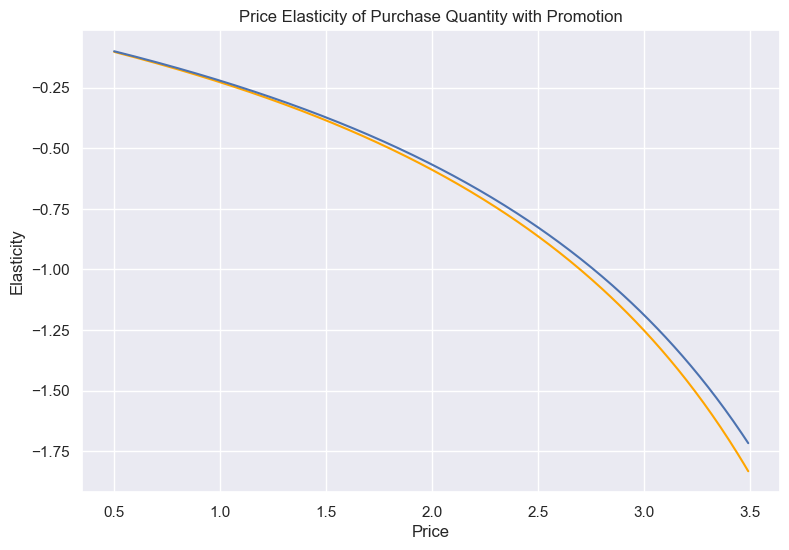

In [305]:
# Plot the two elasticities side by side. 
# We observe that the two elasticities are very close together for almost the entire price range.
# It appears that promotion does not appear to be a significant factor in the customers' decission 
# what quantity of chocolate candy bars to purchase.
plt.figure(figsize = (9, 6))
plt.plot(price_range, price_elasticity_quantity_promotion_yes, color = 'orange')
plt.plot(price_range, price_elasticity_quantity_promotion_no)
plt.xlabel('Price')
plt.ylabel('Elasticity')
plt.title('Price Elasticity of Purchase Quantity with Promotion')